Required packets

In [64]:
from pandas import read_csv, DataFrame
import pywt
import matplotlib.pyplot as plt
import numpy as np

## Wavelet Transform

Apply CWT to match eventually the right seasonality, mother wavelet used is Morlet.

Load the dataset

In [65]:
series = read_csv('series_normalized.csv', header=0, index_col=0, parse_dates=True).squeeze("columns")

# Create a date range with the same start and end dates and frequency as the original series
time_index = series.index

# prepare data
X = series.values.astype('float32')

Plot

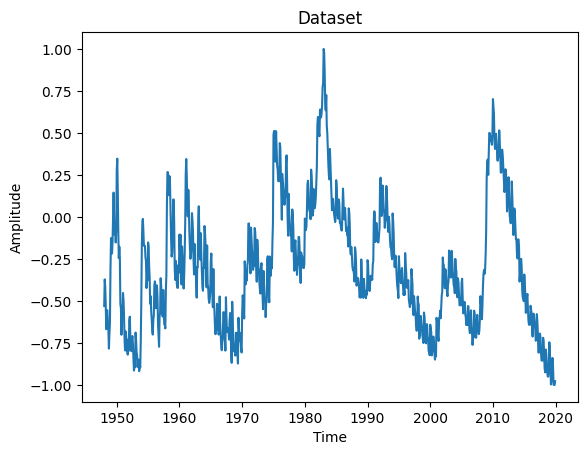

In [66]:
plt.plot(time_index, X)
plt.title('Dataset')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Select the right frequencies and normalize based on sampling frequency

In [67]:
# Calculate the time difference between consecutive timestamps
time_diff = series.index.to_series().diff().min()

# Set dt based on the time difference
dt = time_diff.total_seconds()

# Convert dt to Hertz
fs = 1 / dt

# Define the frequencies for daily to yearly
frequencies = np.array([0.0000115740741, 1.6534391534391535e-06, 4.133597883597884e-07, 3.21502058e-8])

# Select frequencies lower than or equal to the sampling frequency
selected_frequencies = frequencies[frequencies < fs] / fs

Possible Wavelet

In [68]:
wavlist = pywt.wavelist(kind='continuous')
print(wavlist)

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


Wavelet Transform based on scales obtained from selected frequencies

In [69]:
scales = pywt.frequency2scale('morl', selected_frequencies)
coef, freqs=pywt.cwt(X, scales, 'morl')
print(scales)

[10.44642856]


Create the new dataframe with the coef values for each scale

In [70]:
if len(freqs) == 4:
  column_names = ['Daily', 'Weekly', 'Monthly', 'Yearly']
elif len(freqs) == 3:
  column_names = ['Weekly', 'Monthly', 'Yearly']
elif len(freqs) == 2:
  column_names = ['Monthly', 'Yearly']
else:
  column_names = ['Yearly']

# Create a DataFrame with the time index and coefficients
df_coef = DataFrame(data= coef.T, index=time_index, columns=[f'{name}' for name in column_names])
# Set the index name
df_coef.index.name = 'Date'
#df_coef_abs = DataFrame(data= np.abs(coef.T), index=time_index, columns=[f'Freq_{freq}' for freq in freqs])

# Save the DataFrame to a CSV file
df_coef.to_csv('coefficents.csv')
#df_coef_abs.to_csv('abs_coefficents.csv')

Plot the scalogram

/tmp/ipykernel_7685/1253392674.py:1: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(coef, aspect='auto', extent=[time_index[0], time_index[-1], freqs[0], freqs[-1]], cmap='jet', interpolation='bilinear')


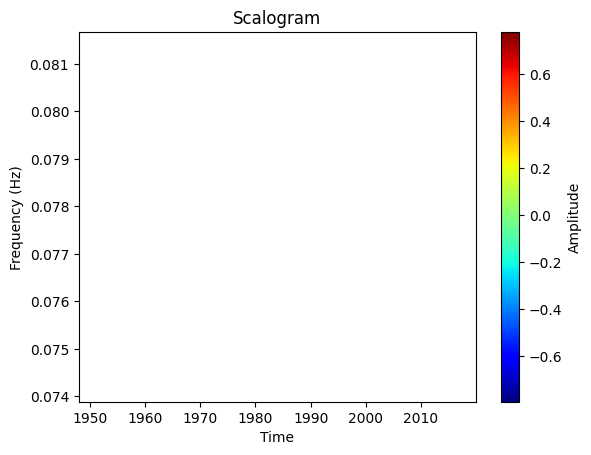

In [71]:
plt.imshow(coef, aspect='auto', extent=[time_index[0], time_index[-1], freqs[0], freqs[-1]], cmap='jet', interpolation='bilinear')
plt.title('Scalogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')
plt.show()

Plot the Wavelet Transform for each scale

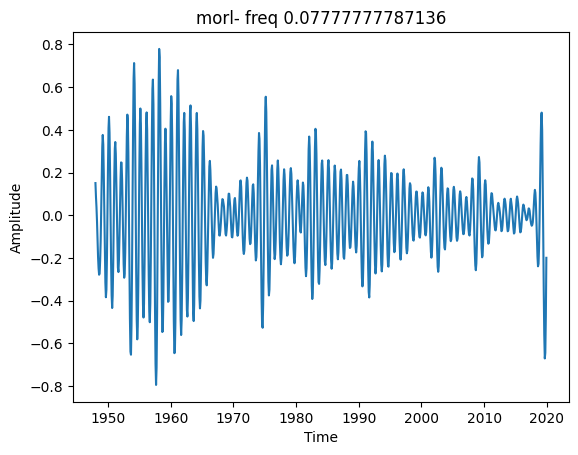

In [72]:
for i in range(len(coef)):
  plt.plot(time_index, coef[i])
  plt.title(f'morl- freq {freqs[i]}')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.show()